# 1. Charger, explorer et prétraiter la base de données « Auto MPG »

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

In [2]:
#charger la dataset en utilisant pandas
df = pd.read_csv('autos_mpg.csv')
print(df.shape)

(398, 9)


In [3]:
df.head(10)

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN,NAME
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
5,15.0,8,429.0,198,4341,10.0,70,USA,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,USA,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,USA,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,USA,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,USA,amc ambassador dpl


In [4]:
# Explorer le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HP            398 non-null    object 
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   YEAR          398 non-null    int64  
 7   ORIGIN        398 non-null    object 
 8   NAME          398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [5]:
#changer le type de la variable HP
df['HP'] = pd.to_numeric(df['HP'], errors = 'coerce')

In [6]:
#Check the existence of null vaues
df.isna().sum()

MPG             0
CYLINDERS       0
DISPLACEMENT    0
HP              6
WEIGHT          0
ACCELERATION    0
YEAR            0
ORIGIN          0
NAME            0
dtype: int64

In [7]:
#delete nan values
df.dropna(axis = 0, how = "any", inplace=True)

In [8]:
# name variable explore
df['NAME'].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: NAME, Length: 301, dtype: int64

In [9]:
# Supprimer le nom de voiture
df.drop('NAME', axis = 1, inplace= True)

/tmp/ipykernel_56147/733254415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

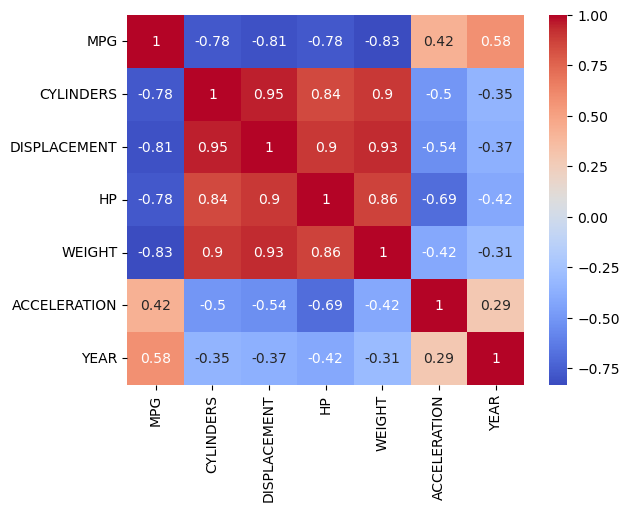

In [10]:
# Correlations
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

Nous remarquons une corrélation linéaire considerable entre la variable dependante et toutes les autres variables

### Visualisation avec seaborn

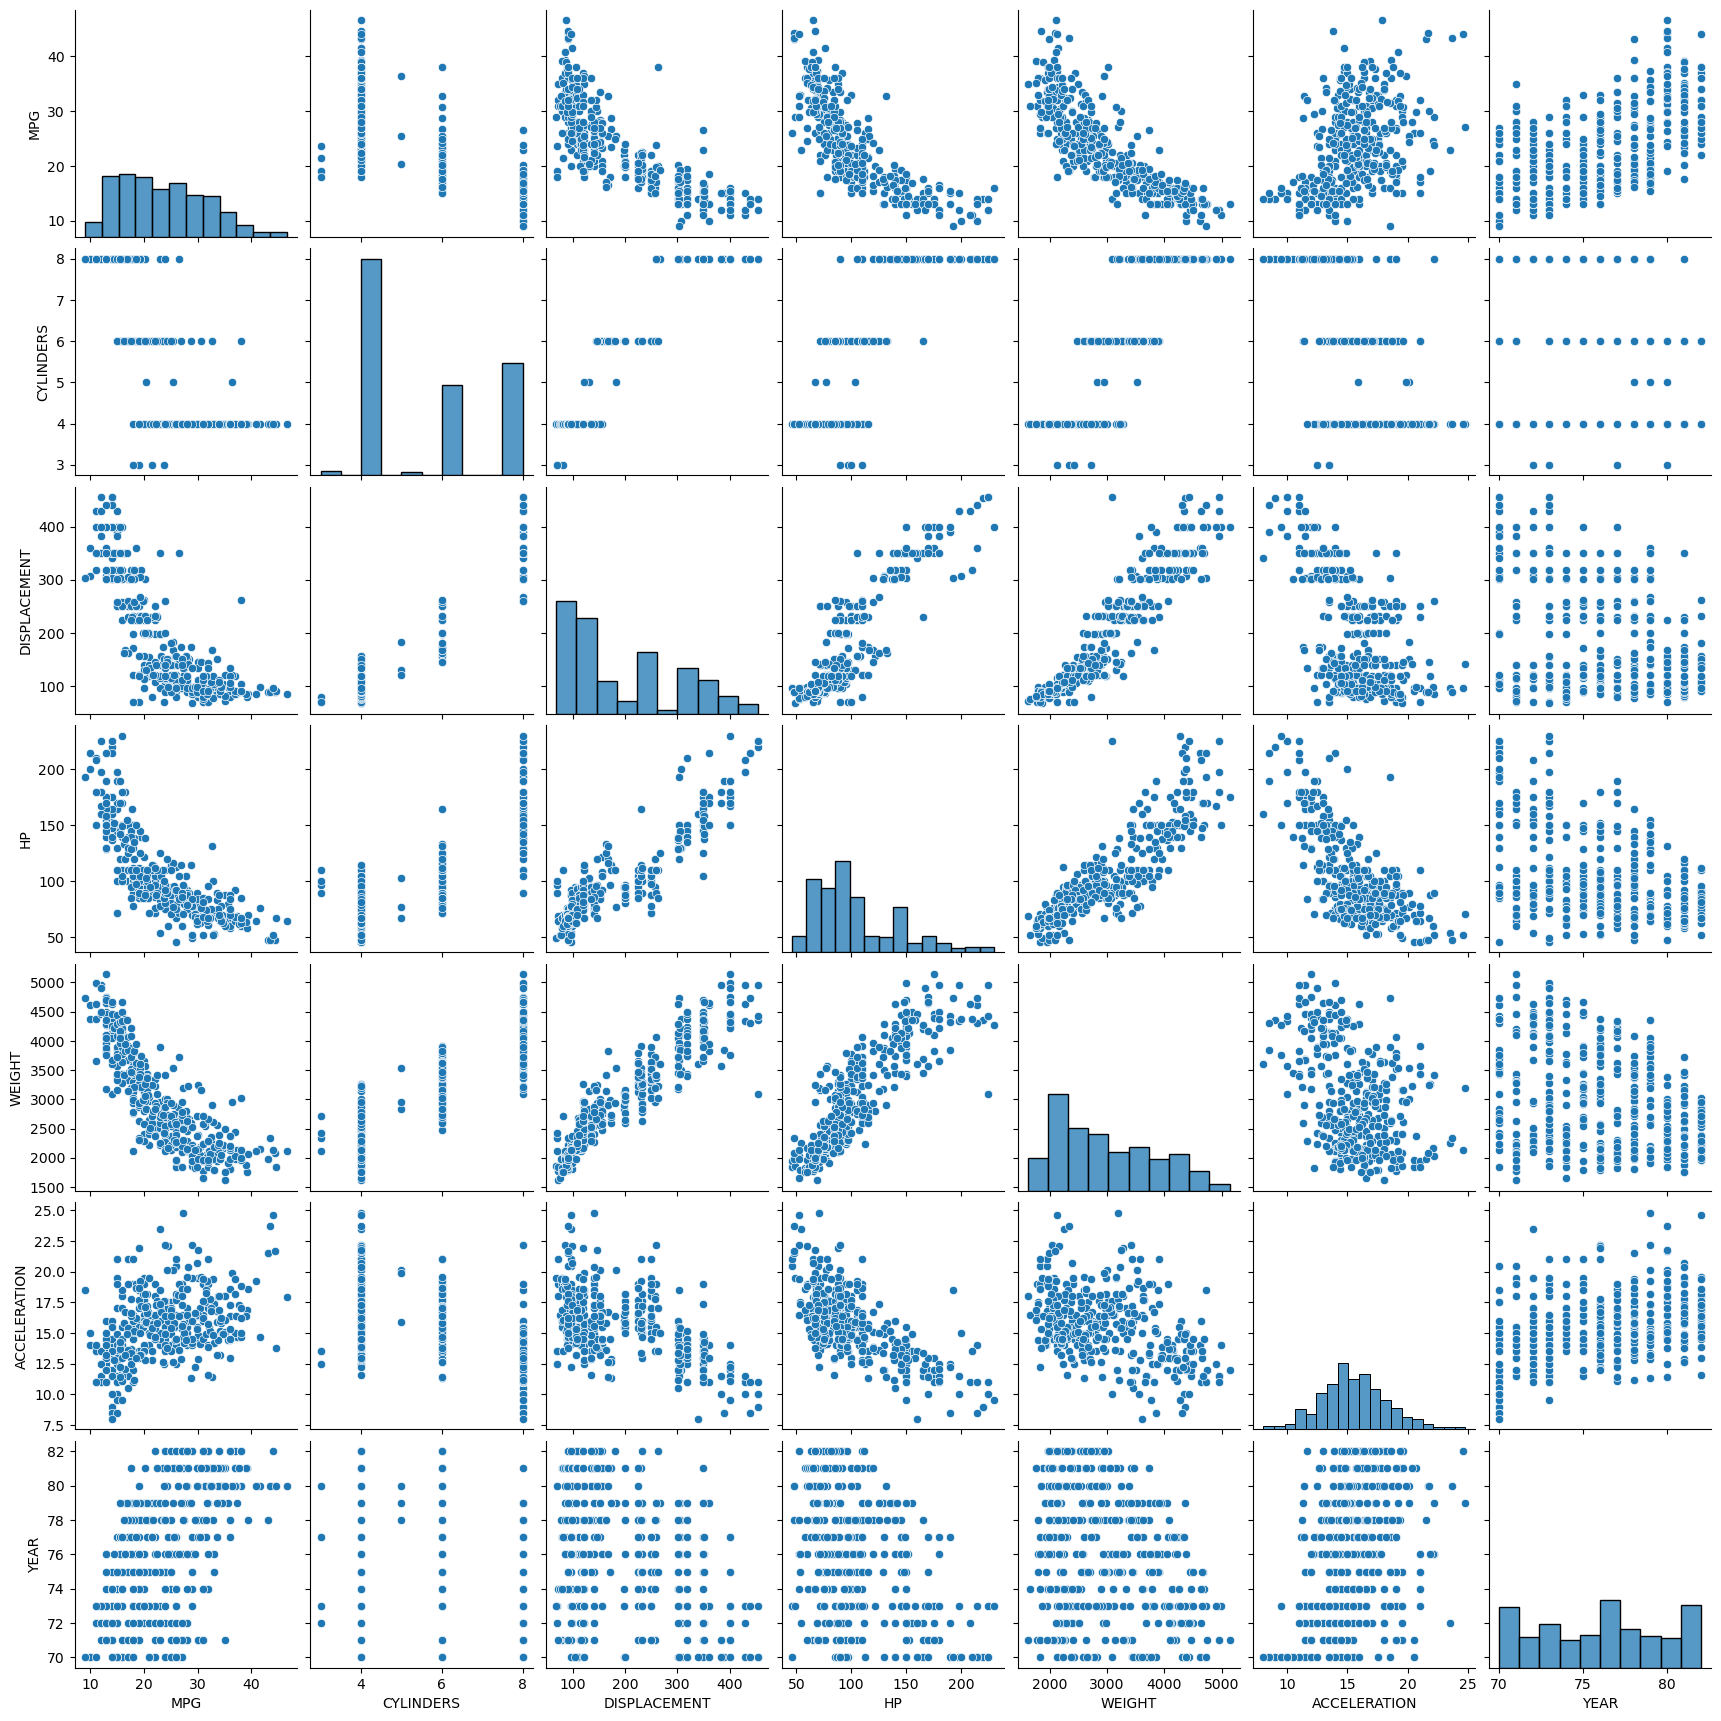

In [11]:
# Visualiser les relation entre chaque pair de variable
sns.pairplot(df)

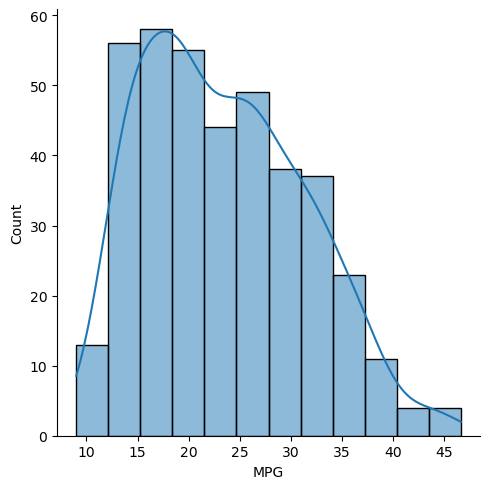

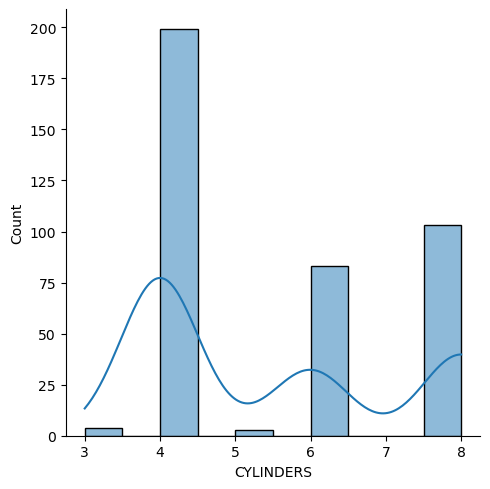

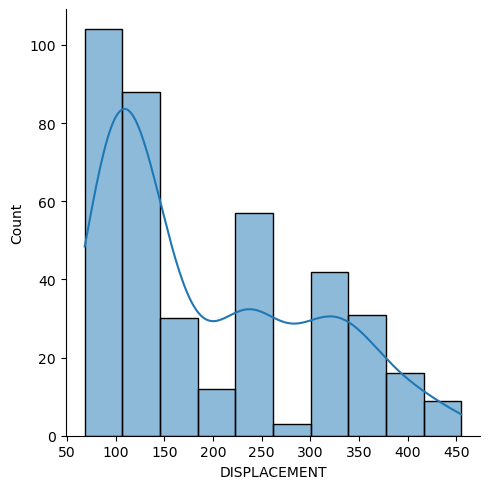

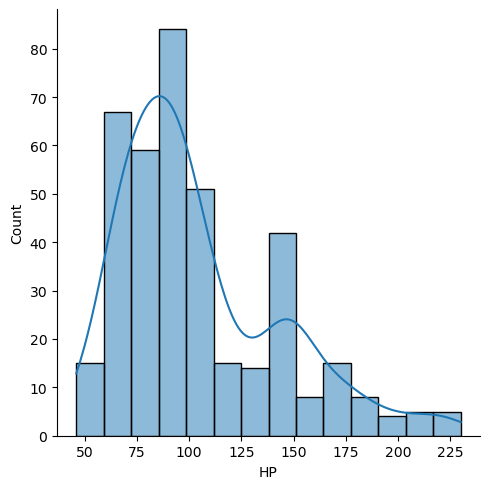

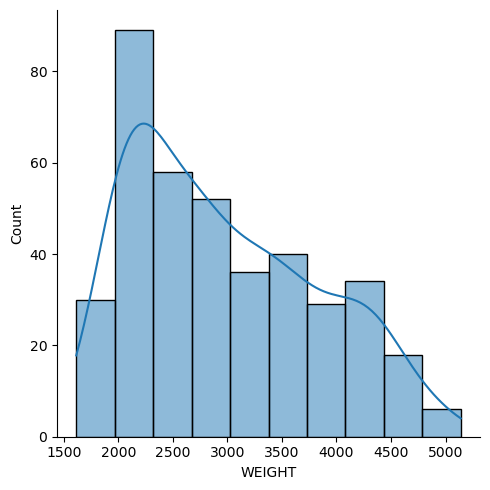

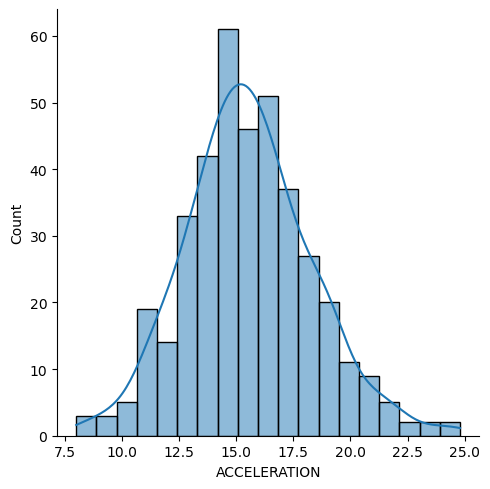

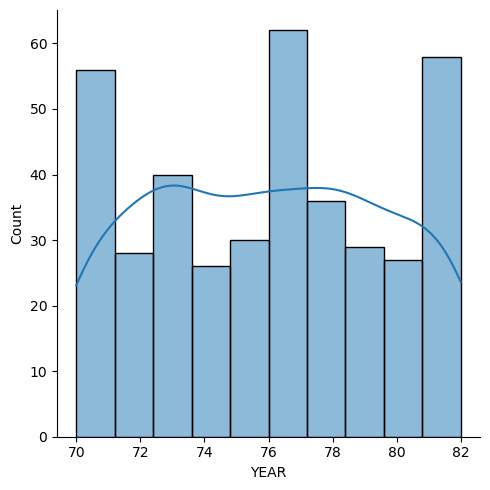

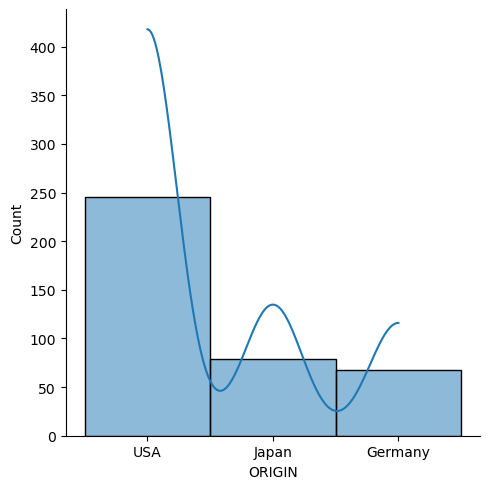

In [12]:
# Visualisation de la distribution des variables
for i in df.columns :
    sns.displot(df, x = i, kde = True)

In [13]:
# Dummies
df_dummies = pd.get_dummies(df,prefix=['ORIGIN'],
columns = ['ORIGIN'], drop_first=True)
df_dummies.head(10)

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN_Japan,ORIGIN_USA
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
5,15.0,8,429.0,198.0,4341,10.0,70,0,1
6,14.0,8,454.0,220.0,4354,9.0,70,0,1
7,14.0,8,440.0,215.0,4312,8.5,70,0,1
8,14.0,8,455.0,225.0,4425,10.0,70,0,1
9,15.0,8,390.0,190.0,3850,8.5,70,0,1


In [14]:
# Ordinal encoder
df_toenc = df[['ORIGIN']]
df_toenc = df_toenc.to_numpy()
enc = OrdinalEncoder()
enc_fitted = enc.fit(df_toenc)
encoded = enc_fitted.transform(df_toenc)
df_ordinal = df
df_ordinal['ORIGIN'] = encoded
df_ordinal.head()

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN
0,18.0,8,307.0,130.0,3504,12.0,70,2.0
1,15.0,8,350.0,165.0,3693,11.5,70,2.0
2,18.0,8,318.0,150.0,3436,11.0,70,2.0
3,16.0,8,304.0,150.0,3433,12.0,70,2.0
4,17.0,8,302.0,140.0,3449,10.5,70,2.0


# No Stand/Norm
# 2. Régression linéaire

### 2.1. Avec holdout

In [23]:
X = df_dummies.drop(["MPG"], axis=1).values[:,:]
y = df_dummies["MPG"] # label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

In [24]:
# Entrainement du model
Model = LinearRegression()
Model.fit(X_train, y_train)
yhat_LR = Model.predict(X_test)

In [25]:
#évaluer les predictions
score = mean_squared_error(y_test, yhat_LR)
print('MSE : %.3f' %score)
score_ab = mean_absolute_error(y_test, yhat_LR)
print('MAE : %.3f' %score_ab)
R2 = r2_score(y_test, yhat_LR)
print('R2 : %.3f' %R2)
    

MSE : 11.051
MAE : 2.669
R2 : 0.801


In [26]:
X = df_ordinal.drop(["MPG"], axis=1).values[:,:]
y = df_ordinal["MPG"] # label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

In [27]:
# Entrainement du model
Model_ = LinearRegression()
Model_.fit(X_train, y_train)
yhat_LR_ = Model_.predict(X_test)

In [28]:
#évaluer les predictions
score_ = mean_squared_error(y_test, yhat_LR)
print('MSE : %.3f' %score)
score_ab_ = mean_absolute_error(y_test, yhat_LR)
print('MAE : %.3f' %score_ab)
R2_ = r2_score(y_test, yhat_LR)
print('R2 : %.3f' %R2)

MSE : 11.051
MAE : 2.669
R2 : 0.801


### 2.2. Feature selection

#### a- Forward feature selection

In [18]:
model_LR = LinearRegression()
sfs = sfs(model_LR, k_features='best',scoring='r2', cv=5, forward = False)
sfs = sfs.fit(X_train, y_train) #trouver les meilleurs attributs

In [19]:
#transformer la matrice original et ne laisser que les attributs sélectionnés
X_train_sfs = sfs.transform(X_train)

In [20]:
X_train_sfs

array([[9.700e+01, 6.700e+01, 2.065e+03, 8.100e+01, 0.000e+00],
       [9.700e+01, 9.200e+01, 2.288e+03, 7.200e+01, 0.000e+00],
       [1.200e+02, 9.700e+01, 2.489e+03, 7.400e+01, 0.000e+00],
       ...,
       [9.000e+01, 4.800e+01, 2.085e+03, 8.000e+01, 0.000e+00],
       [1.400e+02, 8.800e+01, 2.890e+03, 7.900e+01, 1.000e+00],
       [4.550e+02, 2.250e+02, 4.425e+03, 7.000e+01, 1.000e+00]])

In [21]:
# transforation de la matrice de test
X_test_sfs = sfs.transform(X_test)

In [22]:
X_test_sfs = pd.DataFrame(X_test_sfs)
X_test_sfs

,0,1,2,3,4
0,198.0,95.0,3102.0,74.0,1.0
1,79.0,67.0,1963.0,74.0,0.0
2,89.0,71.0,1990.0,78.0,0.0
3,200.0,85.0,2965.0,78.0,1.0
4,146.0,67.0,3250.0,80.0,0.0
...,...,...,...,...,...
93,140.0,83.0,2639.0,75.0,1.0
94,98.0,76.0,2144.0,80.0,0.0
95,98.0,70.0,2120.0,80.0,1.0
96,122.0,86.0,2226.0,72.0,1.0


In [23]:
# Entrainer le modèle de régression sur les données d'entrainements réduites
model_LR.fit(X_train_sfs, y_train)

LinearRegression()

In [24]:
#Prédiction sur les données de test
y_pred = model_LR.predict(X_test_sfs)

In [25]:
#évaluer les predictions 
def evaluation_(y_test, y_pred):
    score = mean_squared_error(y_test, y_pred)
    print('MSE : %.3f' %score)
    score_ab = mean_absolute_error(y_test, y_pred)
    print('MAE : %.3f' %score_ab)
    R2 = r2_score(y_test, y_pred)
    print('R2 : %.3f' %R2)
    
evaluation_(y_test, y_pred)

MSE : 11.007
MAE : 2.686
R2 : 0.802


In [26]:
#évaluer les predictions
def evaluation_1(y_test, y_pred):
    score = mean_squared_error(y_test, y_pred)
    print('MSE : %.3f' %score)
    score_ab = mean_absolute_error(y_test, y_pred)
    print('MAE : %.3f' %score_ab)

In [27]:
sfs_results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_results.sort_values(by='avg_score', ascending=False, inplace=True)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(1, 2, 3, 5, 7)","[0.8641114749101637, 0.7862235696355746, 0.816...",0.816835,"(1, 2, 3, 5, 7)",0.038937,0.030294,0.015147
6,"(0, 1, 2, 3, 5, 7)","[0.8628322725726082, 0.7865153644487851, 0.813...",0.81581,"(0, 1, 2, 3, 5, 7)",0.038704,0.030113,0.015056
7,"(0, 1, 2, 3, 4, 5, 7)","[0.8589292150084245, 0.7881786981228652, 0.815...",0.814071,"(0, 1, 2, 3, 4, 5, 7)",0.04061,0.031596,0.015798
4,"(2, 3, 5, 7)","[0.8684665529973448, 0.78587212846256, 0.81705...",0.811883,"(2, 3, 5, 7)",0.044728,0.0348,0.0174
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8536466766762685, 0.7794544150419823, 0.813...",0.809741,"(0, 1, 2, 3, 4, 5, 6, 7)",0.040585,0.031577,0.015788
3,"(3, 5, 7)","[0.8611446826121113, 0.7875888490444343, 0.816...",0.809469,"(3, 5, 7)",0.043035,0.033483,0.016741
2,"(3, 5)","[0.8435215824049667, 0.7742509950780232, 0.806...",0.797667,"(3, 5)",0.036709,0.028561,0.01428
1,"(3,)","[0.6782450869271991, 0.6722889617578037, 0.646...",0.672902,"(3,)",0.030049,0.023379,0.011689


# 3. Tree Regressor
### 3.1. Avec Holdout

In [28]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)
#prédire test set
yhat_tree = model.predict(X_test)

In [29]:
#évaluer les predictions
evaluation_1(y_test, yhat_tree)

MSE : 12.805
MAE : 2.343


### 3.2. Avec validation croisée

In [30]:
dt = DecisionTreeRegressor(random_state=0)
dt_fit = dt.fit(X, y)
dt_scores = cross_val_score(dt_fit, X, y, cv = 5,
scoring='neg_mean_squared_error')
print("mean cross validation score: {}".format(np.mean(dt_scores)))

mean cross validation score: -16.599129503407987


### 3.3. Avec validation croisée et grid search

In [31]:
#cv and grid search
model = DecisionTreeRegressor()
parameter_space = {
'min_samples_split': range(2, 10),
'max_depth': (20, 30, 50)
}
reg = GridSearchCV(model, parameter_space, scoring =
'neg_mean_squared_error', cv=5, n_jobs=-1)
reg.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': (20, 30, 50),
                         'min_samples_split': range(2, 10)},
             scoring='neg_mean_squared_error')

In [32]:
# Afficher les resultats
print("Best score: %f using %s" % (abs(reg.best_score_), reg.best_params_))
print("Best estimator: ",reg.best_estimator_)

Best score: 15.512572 using {'max_depth': 30, 'min_samples_split': 5}
Best estimator:  DecisionTreeRegressor(max_depth=30, min_samples_split=5)


# 4. SVR

In [33]:
# Entrainement et test du model
model = SVR(C=1.0, epsilon=0.2)
model.fit(X_train, y_train)
yhat_SVR = model.predict(X_test)

In [34]:
#évaluer les predictions
evaluation_1(y_test, yhat_SVR)

MSE : 15.310
MAE : 2.887


In [35]:
#cv and grid search   (changement de parametres)
model = SVR()
parameter_space = {
'gamma': (1e-2, 1e-4),
'C': (1, 10),
'epsilon':[0.1,0.5,0.3]
}
reg = GridSearchCV(model, parameter_space, scoring =
'neg_mean_squared_error', cv=5, n_jobs=-1)
reg.fit(X, y)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': (1, 10), 'epsilon': [0.1, 0.5, 0.3],
                         'gamma': (0.01, 0.0001)},
             scoring='neg_mean_squared_error')

In [36]:
# Afficher les resultats
print("Best score: %f using %s" % (abs(reg.best_score_), reg.best_params_))
print("Best estimator: ",reg.best_estimator_)

Best score: 21.771467 using {'C': 10, 'epsilon': 0.1, 'gamma': 0.0001}
Best estimator:  SVR(C=10, gamma=0.0001)


### 4.1. Feature selection

In [37]:
# with exhaustive fs and cv
lr = LinearRegression()
efs = EFS(estimator=lr, # The Ml model
min_features=1,
max_features=6,
scoring='r2', cv=5)
efs = efs.fit(X, y)
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 246/246

Best accuracy score: 0.61
Best subset (corresponding names): ('0', '1', '3', '5', '7')


In [38]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=False, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
176,"(0, 1, 3, 5, 7)","[0.6175341709646536, 0.7177781924026385, 0.818...",0.612803,"(0, 1, 3, 5, 7)",0.255004,0.198402,0.099201
231,"(0, 1, 3, 5, 6, 7)","[0.6167586204945359, 0.7172780140016961, 0.814...",0.612366,"(0, 1, 3, 5, 6, 7)",0.252221,0.196237,0.098118
141,"(1, 3, 5, 7)","[0.6076858560321196, 0.715538660313749, 0.8145...",0.607405,"(1, 3, 5, 7)",0.25723,0.200134,0.100067
210,"(1, 3, 5, 6, 7)","[0.6069874778089747, 0.7149202841227822, 0.810...",0.606864,"(1, 3, 5, 6, 7)",0.254587,0.198077,0.099039
175,"(0, 1, 3, 5, 6)","[0.5972565993477861, 0.7092216475048159, 0.832...",0.604514,"(0, 1, 3, 5, 6)",0.27858,0.216744,0.108372
...,...,...,...,...,...,...,...
31,"(4, 6)","[0.13085079193510007, -0.12082308231801675, 0....",-0.299652,"(4, 6)",0.774024,0.602217,0.301109
35,"(6, 7)","[-0.1379054134560136, -0.0751527659083091, 0.2...",-0.349802,"(6, 7)",0.937193,0.729168,0.364584
7,"(7,)","[-0.17361402205846388, -0.0668728839858912, 0....",-0.385243,"(7,)",0.97395,0.757766,0.378883
6,"(6,)","[-0.5097223525808423, -0.4043920394537186, 0.1...",-0.573681,"(6,)",0.99572,0.774704,0.387352


In [39]:
#Transformer le dataset pour garder seulement les attributs sélectionnés
X_train_efs = efs.transform(X_train)
X_test_efs = efs.transform(X_test)

In [40]:
# Entrainer le modèle de régression sur les données d'entrainements réduites
model_SVR = SVR()
model_SVR.fit(X_train_efs, y_train)
#Prédiction sur les données de test
y_pred = model_SVR.predict(X_test_efs)
#évaluer les predictions
evaluation_1(y_test, y_pred)


MSE : 15.188
MAE : 2.880


In [41]:
clf = Pipeline([
('feature_selection', EFS(LinearRegression(), scoring='r2',
max_features=6, cv=5)),
('classification', SVR())
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluation_1(y_test, y_pred)


Features: 246/246

MSE : 15.163
MAE : 2.877


# 5. MLP regressor

In [42]:
 # On cree et test le model
model = MLPRegressor(hidden_layer_sizes={100, 200,10}, activation='relu',
solver='adam', max_iter= 5000)
model.fit(X_train, y_train)
yhat_MLP = model.predict(X_test)

In [43]:
#évaluer les predictions
evaluation_1(y_test, yhat_MLP)

MSE : 12.365
MAE : 2.724


In [44]:
parameter_space = {
'hidden_layer_sizes': [{100},{100, 200,50}, {100,100}],
'solver': ['adam', 'sgd'],
'batch_size':[200,50],
'learning_rate':[0.001, 0.0001,'adaptive']
}

In [45]:
#cv and grid search   (changement de parametres)
reg = GridSearchCV(model, parameter_space, scoring =
'neg_mean_squared_error', cv=5, n_jobs=-1)
reg.fit(X, y)

/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/olivier/anaconda3/lib/python3.9/site-packages/nump

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes={200, 10, 100},
                                    max_iter=5000),
             n_jobs=-1,
             param_grid={'batch_size': [200, 50],
                         'hidden_layer_sizes': [{100}, {200, 50, 100}, {100}],
                         'learning_rate': [0.001, 0.0001, 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='neg_mean_squared_error')

In [46]:
# Afficher les resultats
print("Best score: %f using %s" % (abs(reg.best_score_), reg.best_params_))
print("Best estimator: ",reg.best_estimator_)

Best score: 11.899143 using {'batch_size': 50, 'hidden_layer_sizes': {100}, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best estimator:  MLPRegressor(batch_size=50, hidden_layer_sizes={100}, learning_rate='adaptive',
             max_iter=5000)


# 6. Normalization/Standarisation
## Holdout
### 6.1. MLP Regressor en utilisant la normalisation et la standarisation
Standard Scaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)
model = MLPRegressor(hidden_layer_sizes={100, 200,10}, activation='relu',
solver='adam', max_iter= 5000)
model = make_pipeline(StandardScaler(), model)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [48]:
#évaluer les predictions
evaluation_1(y_test, yhat)

MSE : 6.765
MAE : 1.876


d- MinMax normalization

In [49]:
model = MLPRegressor(hidden_layer_sizes={100, 200,10}, activation='relu',
solver='adam', max_iter= 5000)
model = make_pipeline(MinMaxScaler(), model)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [50]:
#évaluer les predictions
evaluation_1(y_test, yhat)

MSE : 5.082
MAE : 1.682


### 6.2. Linear Regression en utilisant la normalisation et la standarisation
Standard Scaler

In [51]:
# Entrainement du model
Model = LinearRegression()
Model = make_pipeline(StandardScaler(), Model)
Model.fit(X_train, y_train)
yhat_LR = Model.predict(X_test)
#évaluer les predictions
evaluation_(y_test, yhat_LR)


MSE : 11.051
MAE : 2.669
R2 : 0.801


MinMaxScaler

In [52]:
# Entrainement du model
Model = LinearRegression()
Model = make_pipeline(MinMaxScaler(), Model)
Model.fit(X_train, y_train)
yhat_LR = Model.predict(X_test)
#évaluer les predictions
evaluation_(y_test, yhat_LR)

MSE : 11.051
MAE : 2.669
R2 : 0.801


### 6.3. Tree Regressor en utilisant la normalisation et la standarisation
Standard Scaler

In [53]:
# Entrainement du model
Model = DecisionTreeRegressor()
Model = make_pipeline(StandardScaler(), Model)
Model.fit(X_train, y_train)
yhat_DT = Model.predict(X_test)
#évaluer les predictions
evaluation_1(y_test, yhat_DT)

MSE : 12.286
MAE : 2.274


MinMax Scaler

In [54]:
# Entrainement du model
Model = DecisionTreeRegressor()
Model = make_pipeline(MinMaxScaler(), Model)
Model.fit(X_train, y_train)
yhat_DT = Model.predict(X_test)
#évaluer les predictions
evaluation_1(y_test, yhat_DT)

MSE : 13.163
MAE : 2.368


### 6.4. Support Vector Regressor en utilisant la normalisation et la standarisation
Standard Scaler

In [55]:
# Entrainement du model
Model = SVR()
Model = make_pipeline(StandardScaler(), Model)
Model.fit(X_train, y_train)
yhat_SVR = Model.predict(X_test)
#évaluer les predictions
evaluation_1(y_test, yhat_SVR)

MSE : 7.876
MAE : 2.067


MinMax Scaler

In [56]:
# Entrainement du model
Model = SVR()
Model = make_pipeline(MinMaxScaler(), Model)
Model.fit(X_train, y_train)
yhat_SVR = Model.predict(X_test)
#évaluer les predictions
evaluation_1(y_test, yhat_SVR)

MSE : 9.600
MAE : 2.273


## Cross Validation & Grid Search

### 6.5. MLP Regressor en utilisant la normalisation et la standarisation
Standard Scaler

In [57]:
#cv and grid search
model = MLPRegressor(hidden_layer_sizes=(100, 200, 10), activation='relu',
                     solver='adam', max_iter=5000)
parameter_space = {
    'mlpregressor__hidden_layer_sizes': [(100,), (100, 200, 50), (100, 100)],
    'mlpregressor__solver': ['adam', 'sgd'],
    'mlpregressor__batch_size': [200, 50],
    'mlpregressor__learning_rate': [0.001, 0.0001, 'adaptive']
}

pipeline = make_pipeline(StandardScaler(), model)

reg = GridSearchCV(pipeline, parameter_space, scoring='neg_mean_squared_error',
                   cv=5, n_jobs=-1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
evaluation_1(y_test, y_pred)

/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 745, in fit
  

MSE : 5.319
MAE : 1.622


In [58]:
#cv and grid search avec MinMax Scaler
model = MLPRegressor(hidden_layer_sizes=(100, 200, 10), activation='relu',
                     solver='adam', max_iter=5000)
parameter_space = {
    'mlpregressor__hidden_layer_sizes': [(100,), (100, 200, 50), (100, 100)],
    'mlpregressor__solver': ['adam', 'sgd'],
    'mlpregressor__batch_size': [200, 50],
    'mlpregressor__learning_rate': [0.001, 0.0001, 'adaptive']
}

pipeline = make_pipeline(MinMaxScaler(), model)

reg = GridSearchCV(pipeline, parameter_space, scoring='neg_mean_squared_error',
                   cv=5, n_jobs=-1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

evaluation_1(y_test, y_pred)

/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 745, in fit
  

MSE : 5.310
MAE : 1.685


# 8. Visualisation

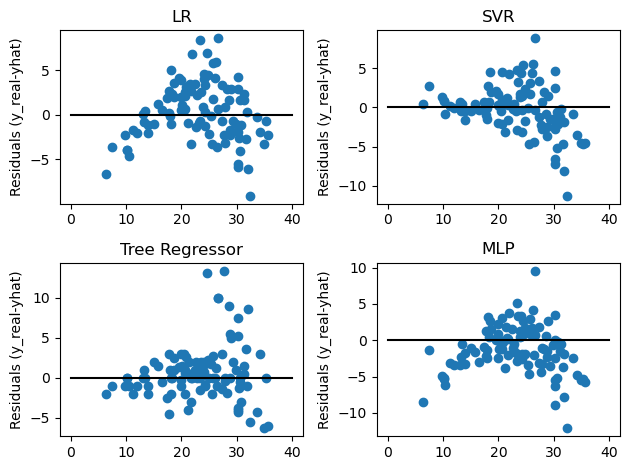

In [59]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(yhat_LR, yhat_LR-y_test)
axs[0, 0].plot([0,40],[0,0],color='black')
axs[0, 0].set_title("LR")
axs[0, 0].set_ylabel('Residuals (y_real-yhat)')
axs[1, 0].scatter(yhat_LR, yhat_tree-y_test)
axs[1, 0].plot([0,40],[0,0],color='black')
axs[1, 0].set_title("Tree Regressor")
axs[1, 0].set_ylabel('Residuals (y_real-yhat)')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].scatter(yhat_LR, yhat_SVR-y_test)
axs[0, 1].plot([0,40],[0,0],color='black')
axs[0, 1].set_title("SVR")
axs[0, 1].set_ylabel('Residuals (y_real-yhat)')
axs[1, 1].scatter(yhat_LR, yhat_MLP-y_test)
axs[1, 1].plot([0,40],[0,0],color='black')
axs[1, 1].set_title("MLP")
axs[1, 1].set_ylabel('Residuals (y_real-yhat)')
fig.tight_layout()

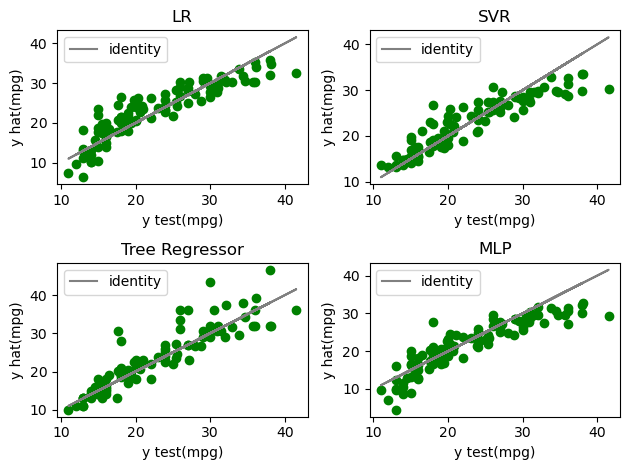

In [60]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(y_test, yhat_LR, color = "g")
axs[0, 0].plot(y_test, y_test, color = "gray", label = "identity")
axs[0, 0].set_title("LR")
axs[0, 0].set_xlabel("y test(mpg)")
axs[0, 0].set_ylabel('y hat(mpg)')
axs[0, 0].legend()

axs[1, 0].scatter(y_test, yhat_tree, color = "g")
axs[1, 0].plot(y_test, y_test, color = "gray", label = "identity")
axs[1, 0].set_title("Tree Regressor")
axs[1, 0].set_xlabel("y test(mpg)")
axs[1, 0].set_ylabel('y hat(mpg)')
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].legend()

axs[0, 1].scatter(y_test, yhat_SVR, color = "g")
axs[0, 1].plot(y_test, y_test, color = "gray", label = "identity")
axs[0, 1].set_title("SVR")
axs[0, 1].set_xlabel("y test(mpg)")
axs[0, 1].set_ylabel('y hat(mpg)')
axs[0, 1].legend()

axs[1, 1].scatter(y_test, yhat_MLP, color = "g")
axs[1, 1].plot(y_test, y_test, color = "gray", label = "identity")
axs[1, 1].set_title("MLP")
axs[1, 1].set_xlabel("y test(mpg)")
axs[1, 1].set_ylabel('y hat(mpg)')
axs[1, 1].legend()

fig.tight_layout()

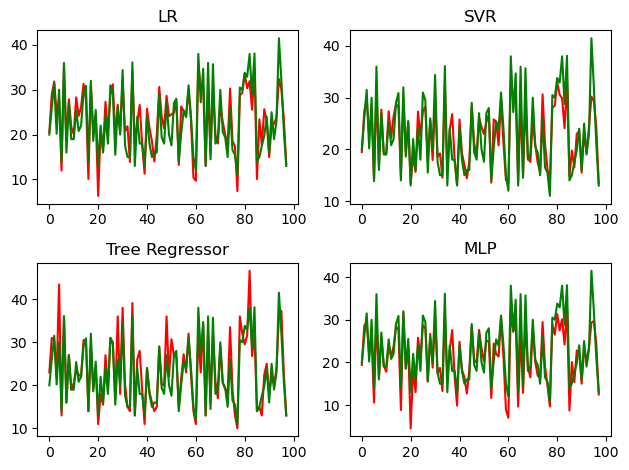

In [61]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(range(0,len(y_test)),yhat_LR, color= "red")
axs[0, 0].plot(range(0,len(y_test)),y_test, color= "green")
axs[0, 0].set_title("LR")
axs[1, 0].plot(range(0,len(y_test)),yhat_tree, color= "red")
axs[1, 0].plot(range(0,len(y_test)),y_test, color= "green")
axs[1, 0].set_title("Tree Regressor")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(range(0,len(y_test)),yhat_SVR, color= "red")
axs[0, 1].plot(range(0,len(y_test)),y_test, color= "green")
axs[0, 1].set_title("SVR")
axs[1, 1].plot(range(0,len(y_test)),yhat_MLP, color= "red")
axs[1, 1].plot(range(0,len(y_test)),y_test, color= "green")
axs[1, 1].set_title("MLP")
fig.tight_layout()